In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['lines.markersize'] = 8
matplotlib.rcParams['grid.color'] = '0.9'
matplotlib.rcParams['grid.linestyle'] = '-'
matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
matplotlib.rcParams['savefig.format'] = 'pdf'

blue =  '#377eb8'
orange = '#ff7f00'
green = '#4daf4a'
red = '#e41a1c'

# Accuracy Benchmark for the Automatic Differentiation Hessians for MACE

### We used the MACE-MP-0 model and compared it for 5 different porous materials with central finite differences for numerical derivatives (in both cases, `float32` and `float64`). 


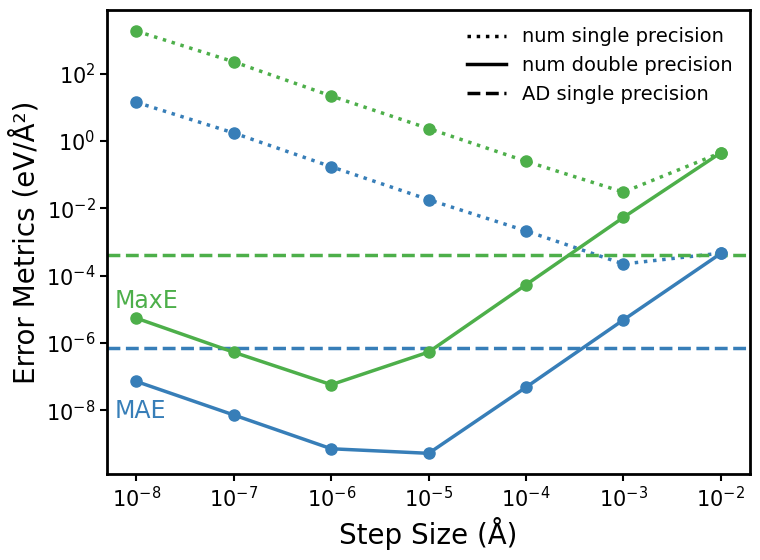

In [3]:
csv_file = 'accuracy_conversion_mofs_num_f32_a_f64.csv'
data = pd.read_csv(csv_file)

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Include 'h' column for grouping
numeric_data['h'] = data['h']

# Group by 'h' and calculate the mean for each group
grouped_data = numeric_data.groupby('h').mean().reset_index()

#print(grouped_data)
#Display the grouped DataFrame
grouped_data['h'] = pd.to_numeric(grouped_data['h'], errors='coerce')

auto_f32 = grouped_data.tail(1).copy() 
grouped_data = grouped_data.head(7).copy().sort_values(by='h', ascending=True)

#print(grouped_data)
# Extract the columns for plotting
h_values = grouped_data['h']
max_diff = grouped_data['Max_diff']
rmsd = grouped_data['RMSE']
mae = grouped_data['MAE']


plt.figure(figsize=(8,6))
max_diff_line, =plt.plot(h_values, max_diff, label='Max_diff', marker='o',color=green,linestyle=':')
mae_line, = plt.plot(h_values, mae, label='MAE', marker='o',color=blue,linestyle=':')

# Add a horizontal line for MAE f32 vs f64
plt.axhline(y=auto_f32['MAE'].iloc[0], color=mae_line.get_color(), linestyle='--', label='MAE f64 vs f32')
plt.axhline(y=auto_f32['Max_diff'].iloc[0], color=max_diff_line.get_color(), linestyle='--', label='MaxE f64 vs f32')

# Load the CSV file into a DataFrame
csv_file = 'accuracy_conversion_mofs.csv'
data = pd.read_csv(csv_file)

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Include 'h' column for grouping
numeric_data['h'] = data['h']

# Group by 'h' and calculate the mean for each group
grouped_data = numeric_data.groupby('h').mean().reset_index()

# Extract the columns for plotting
h_values = grouped_data['h']
max_diff = grouped_data['Max_diff']
rmsd = grouped_data['RMSE']
mae = grouped_data['MAE']

max_diff_line, =plt.plot(h_values, max_diff, label='Max_diff', marker='o',color=green)
mae_line, = plt.plot(h_values, mae, label='MAE', marker='o',color=blue)

# Adding text annotations near the end of each line
plt.text(np.array(h_values)[0]*0.6, np.array(max_diff)[0]*1.4, 'MaxE', color=max_diff_line.get_color(), fontsize=17, ha='left', va='bottom')
plt.text(np.array(h_values)[0]*0.6, np.array(mae)[0]*0.06, 'MAE', color=mae_line.get_color(), fontsize=17, ha='left', va='bottom')

loc='center'


plt.xscale('log')
plt.yscale('log')

ax = plt.gca()
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())

plt.xlabel('Step Size (Å)')
plt.ylabel('Error Metrics (eV/Å²)')

# Show the plots
# Create a custom legend with two entries
handles = [
    plt.Line2D([0], [0], linestyle=':', color='k', label='num single precision'),#color=mae_line.get_color(
    plt.Line2D([0], [0], linestyle='-', color='k', label='num double precision'),
    plt.Line2D([0], [0], linestyle='--',color='k', label='AD single precision')
]
plt.legend(handles=handles,frameon=False)
plt.tight_layout()
plt.savefig("acc_converge_ad_f32_vs_f64_noRMSE.svg")
plt.show()
